In [1020]:
!pip install pandas folium geopy

In [1021]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [1022]:
import geopandas as gpd

In [1023]:
from api_key import api_key_census
import requests

#For getting median_income from API

In [1024]:
crime_df = pd.read_csv('crime_data.csv')

In [1025]:
economical_df = pd.read_csv('economical_data_2022.csv')

In [1026]:
geodata = gpd.read_file('LAPD_Division.geojson')

In [1027]:
geodata

,OBJECTID,APREC,PREC,AREA,PERIMETER,geometry
0,1,MISSION,19,6.995826e+08,190817.495739,"POLYGON ((6408504.431 1944548.806, 6409580 194..."
1,2,DEVONSHIRE,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408709 194..."
2,3,FOOTHILL,16,1.297385e+09,203717.879169,"POLYGON ((6436082 1929575.125, 6436122.235 192..."
3,4,TOPANGA,21,9.090326e+08,155505.795458,"POLYGON ((6370761.344 1909803.646, 6370805 190..."
4,5,WEST VALLEY,10,9.364057e+08,136316.899694,"POLYGON ((6391688 1903046, 6391826 1903047.75,..."
5,6,NORTH HOLLYWOOD,15,6.346011e+08,187366.252732,"POLYGON ((6457961.5 1864933.875, 6457941 18649..."
6,7,VAN NUYS,9,4.896950e+08,116288.308461,"POLYGON ((6418600.165 1901509.458, 6418634 190..."
7,8,NORTHEAST,11,8.156022e+08,178460.722082,"POLYGON ((6462116.637 1877212.646, 6462122 187..."
8,9,HOLLYWOOD,6,3.718353e+08,115808.747099,"POLYGON ((6456659.5 1865616.75, 6456661 186560..."
9,10,WEST LOS ANGELES,8,1.803659e+09,295206.415546,"POLYGON ((6404838.438 1831903.047, 6404827.906..."


In [1028]:
geodata.loc[geodata['OBJECTID'] == 1]

,OBJECTID,APREC,PREC,AREA,PERIMETER,geometry
0,1,MISSION,19,6.995826e+08,190817.495739,"POLYGON ((6408504.431 1944548.806, 6409580 194..."


In [1029]:
price = geodata['geometry'].values[0]

In [1030]:
geodata.dtypes

OBJECTID        int64
APREC          object
PREC            int64
AREA          float64
PERIMETER     float64
geometry     geometry
dtype: object

In [1031]:
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944230,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0385,44,F,O,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
944231,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,2047 0400 0429 0444 1202 1822,80,F,O,124.0,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
944232,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,0,X,X,503.0,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
944233,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0334 0416 0445 0449 1202,70,F,W,102.0,SIDEWALK,308.0,STICK,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [1032]:
economical_df

,NAME,B19013_001E,B23025_003E,B23025_005E,B15003_022E,state,county,county subdivision
0,"Agoura Hills-Malibu CCD, Los Angeles County, C...",157333,30594,2093,15573,6,37,90015
1,"Compton CCD, Los Angeles County, California",77931,165822,13260,29818,6,37,90560
2,"Downey-Norwalk CCD, Los Angeles County, Califo...",84976,210524,13089,49877,6,37,90730
3,"East San Gabriel Valley CCD, Los Angeles Count...",91440,481099,29949,126953,6,37,90810
4,"Inglewood CCD, Los Angeles County, California",70593,198344,14600,39929,6,37,91400
5,"Long Beach-Lakewood CCD, Los Angeles County, C...",83431,311043,19804,86339,6,37,91730
6,"Los Angeles CCD, Los Angeles County, California",73626,1405660,110592,448312,6,37,91750
7,"Newhall CCD, Los Angeles County, California",119825,137946,8277,47060,6,37,92110
8,"North Antelope Valley CCD, Los Angeles County,...",71045,83029,6280,15490,6,37,92140
9,"Palos Verdes CCD, Los Angeles County, California",148246,43535,1941,22932,6,37,92360


## Cleaning Data

In [1034]:
geodata.columns = geodata.columns.str.lower().str.replace(' ', '_')
geodata.columns = geodata.columns.str.replace('aprec', 'area_name') 

#Cleaning the names of columns API DF

In [1035]:
geodata["area_name"] = geodata["area_name"].str.capitalize()

In [1036]:
geodata

,objectid,area_name,prec,area,perimeter,geometry
0,1,Mission,19,6.995826e+08,190817.495739,"POLYGON ((6408504.431 1944548.806, 6409580 194..."
1,2,Devonshire,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408709 194..."
2,3,Foothill,16,1.297385e+09,203717.879169,"POLYGON ((6436082 1929575.125, 6436122.235 192..."
3,4,Topanga,21,9.090326e+08,155505.795458,"POLYGON ((6370761.344 1909803.646, 6370805 190..."
4,5,West valley,10,9.364057e+08,136316.899694,"POLYGON ((6391688 1903046, 6391826 1903047.75,..."
5,6,North hollywood,15,6.346011e+08,187366.252732,"POLYGON ((6457961.5 1864933.875, 6457941 18649..."
6,7,Van nuys,9,4.896950e+08,116288.308461,"POLYGON ((6418600.165 1901509.458, 6418634 190..."
7,8,Northeast,11,8.156022e+08,178460.722082,"POLYGON ((6462116.637 1877212.646, 6462122 187..."
8,9,Hollywood,6,3.718353e+08,115808.747099,"POLYGON ((6456659.5 1865616.75, 6456661 186560..."
9,10,West los angeles,8,1.803659e+09,295206.415546,"POLYGON ((6404838.438 1831903.047, 6404827.906..."


In [ ]:
geodata.drop('objectid', axis=1, inplace=True)
geodata.drop('prec', axis=1, inplace=True)


In [1037]:
economical_df.columns = economical_df.columns.str.lower().str.replace(' ', '_')
economical_df.columns = economical_df.columns.str.replace('name', 'area_name') \
                                                .str.replace('b19013_001e', 'median_income') \
                                                .str.replace('b23025_003e', 'civilian_labor_force') \
                                                .str.replace('b23025_005e', 'number_unemployed_individuals') \
                                                .str.replace('b15003_022e', 'education') 

#Cleaning the names of columns API DF

In [1038]:
#Changing names of divisions from API

name_divisions = {
    
    "Los Angeles CCD, Los Angeles County, California": "Central",
    "South Gate-East Los Angeles CCD, Los Angeles County, California": "77th Street",
    "South Bay Cities CCD, Los Angeles County, California": "Pacific",
    "Inglewood CCD, Los Angeles County, California": "Southwest",
    "Long Beach-Lakewood CCD, Los Angeles County, California": "Hollywood",
    "San Fernando Valley CCD, Los Angeles County, California": "N Hollywood ",
    "Compton CCD, Los Angeles County, California": "Southeast",
    "Pasadena CCD, Los Angeles County, California": "Olympic",
    "Torrance CCD, Los Angeles County, California": "Newton",
    "Whittier CCD, Los Angeles County, California": "Wilshire",
    "Agoura Hills-Malibu CCD, Los Angeles County, California": "West LA",
    "Santa Monica CCD, Los Angeles County, California": "Van Nuys",
    "East San Gabriel Valley CCD, Los Angeles County, California": "Northeast",
    "Southwest San Gabriel Valley CCD, Los Angeles County, California": "West Valley",
    "Palos Verdes CCD, Los Angeles County, California": "Harbor",
    "South Antelope Valley CCD, Los Angeles County, California": "Devonshire",
    "Upper San Gabriel Valley CCD, Los Angeles County, California": "Topanga",
    "Newhall CCD, Los Angeles County, California": "Mission",
    "Downey-Norwalk CCD, Los Angeles County, California": "Hollenbeck",
    "North Antelope Valley CCD, Los Angeles County, California": "Foothill",
    
}

#Rampart we need to do smth with it

economical_df['area_name'] = economical_df['area_name'].replace(name_divisions)

In [1039]:
economical_df_addrow = economical_df.loc[economical_df['area_name'] == 'Northeast']
#Creating missing row (missin district), 21-20

economical_df_addrow['area_name'] = economical_df_addrow['area_name'].str.replace('Northeast', 'Rampart')
#Replace name if district in missing row (missin district), 21-20

economical_df = pd.concat([economical_df, economical_df_addrow], axis=0)
economical_df = economical_df.reset_index(drop=True)
#Adding missing row to economical dataset and reset index

economical_df

/var/folders/1_/fmystfg15lbf3t1n1mmy4psw0000gn/T/ipykernel_29165/2746753488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economical_df_addrow['area_name'] = economical_df_addrow['area_name'].str.replace('Northeast', 'Rampart')


,area_name,median_income,civilian_labor_force,number_unemployed_individuals,education,state,county,county_subdivision
0,West LA,157333,30594,2093,15573,6,37,90015
1,Southeast,77931,165822,13260,29818,6,37,90560
2,Hollenbeck,84976,210524,13089,49877,6,37,90730
3,Northeast,91440,481099,29949,126953,6,37,90810
4,Southwest,70593,198344,14600,39929,6,37,91400
5,Hollywood,83431,311043,19804,86339,6,37,91730
6,Central,73626,1405660,110592,448312,6,37,91750
7,Mission,119825,137946,8277,47060,6,37,92110
8,Foothill,71045,83029,6280,15490,6,37,92140
9,Harbor,148246,43535,1941,22932,6,37,92360


In [1040]:
economical_df['unemployed_rating'] = economical_df["number_unemployed_individuals"] / economical_df["civilian_labor_force"] * 100
economical_df['unemployed_rating'] = economical_df['unemployed_rating'].round(2)

economical_df

,area_name,median_income,civilian_labor_force,number_unemployed_individuals,education,state,county,county_subdivision,unemployed_rating
0,West LA,157333,30594,2093,15573,6,37,90015,6.84
1,Southeast,77931,165822,13260,29818,6,37,90560,8.00
2,Hollenbeck,84976,210524,13089,49877,6,37,90730,6.22
3,Northeast,91440,481099,29949,126953,6,37,90810,6.23
4,Southwest,70593,198344,14600,39929,6,37,91400,7.36
5,Hollywood,83431,311043,19804,86339,6,37,91730,6.37
6,Central,73626,1405660,110592,448312,6,37,91750,7.87
7,Mission,119825,137946,8277,47060,6,37,92110,6.00
8,Foothill,71045,83029,6280,15490,6,37,92140,7.56
9,Harbor,148246,43535,1941,22932,6,37,92360,4.46


In [1041]:
economical_df["area_name"].str.capitalize()

0          West la
1        Southeast
2       Hollenbeck
3        Northeast
4        Southwest
5        Hollywood
6          Central
7          Mission
8         Foothill
9           Harbor
10         Olympic
11    N hollywood 
12        Van nuys
13      Devonshire
14         Pacific
15     77th street
16     West valley
17          Newton
18         Topanga
19        Wilshire
20         Rampart
Name: area_name, dtype: object

In [1042]:
crime_df.columns = crime_df.columns.str.lower().str.replace(' ', '_')

#Cleaning the names of columns (main dataset)

In [1043]:
crime_df["area_name"] = crime_df["area_name"].str.capitalize()

In [1044]:
crime_df["area_name"].value_counts()

area_name
Central        63732
77th street    59228
Pacific        55020
Southwest      53464
Hollywood      49488
N hollywood    47924
Southeast      47721
Olympic        47380
Newton         46518
Wilshire       45168
Rampart        43925
West la        43010
Van nuys       40344
Northeast      40211
West valley    40001
Harbor         39098
Devonshire     39035
Topanga        38925
Mission        37817
Hollenbeck     34763
Foothill       31463
Name: count, dtype: int64

In [1045]:
crime_df

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944230,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0385,44,F,O,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
944231,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,2047 0400 0429 0444 1202 1822,80,F,O,124.0,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
944232,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,0,X,X,503.0,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
944233,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0334 0416 0445 0449 1202,70,F,W,102.0,SIDEWALK,308.0,STICK,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [1046]:
crime_df.drop('dr_no', axis=1, inplace=True)
crime_df.drop('date_rptd', axis=1, inplace=True)
crime_df.drop('rpt_dist_no', axis=1, inplace=True)
crime_df.drop('part_1-2', axis=1, inplace=True)
crime_df.drop('crm_cd', axis=1, inplace=True)
crime_df.drop('mocodes', axis=1, inplace=True)
crime_df.drop('premis_cd', axis=1, inplace=True)
crime_df.drop('weapon_used_cd', axis=1, inplace=True)
crime_df.drop('status', axis=1, inplace=True)
crime_df.drop('crm_cd_1', axis=1, inplace=True)
crime_df.drop('crm_cd_2', axis=1, inplace=True)
crime_df.drop('crm_cd_3', axis=1, inplace=True)
crime_df.drop('crm_cd_4', axis=1, inplace=True)
crime_df.drop('location', axis=1, inplace=True)
crime_df.drop('cross_street', axis=1, inplace=True)

#Deleted these columns.

In [1047]:
crime_df["vict_descent"].isna().sum()

126605

In [1048]:
crime_df["vict_descent"].value_counts()

vict_descent
H    286423
W    190547
B    131747
X     96218
O     74428
A     20617
K      5230
F      4126
C      3836
J      1343
V      1017
I       909
Z       472
P       255
U       196
D        79
G        68
L        66
S        51
-         2
Name: count, dtype: int64

In [1049]:
filtered_crime_df = crime_df.loc[crime_df['vict_descent'].isna()]
filtered_crime_df

,date_occ,time_occ,area,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,lat,lon
13,11/01/2020 12:00:00 AM,130,10,West valley,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,34.1939,-118.4859
24,09/09/2020 12:00:00 AM,630,4,Hollenbeck,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,34.0820,-118.2130
27,08/14/2020 12:00:00 AM,1300,21,Topanga,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,NaN,NaN,OTHER BUSINESS,NaN,Invest Cont,34.2105,-118.6157
33,01/18/2020 12:00:00 AM,1600,14,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,STREET,NaN,Invest Cont,34.0022,-118.4255
34,05/26/2020 12:00:00 AM,1200,2,Rampart,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,STREET,NaN,Invest Cont,34.0697,-118.2779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944207,04/20/2024 12:00:00 AM,1700,15,N hollywood,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,34.1346,-118.3759
944218,01/02/2024 12:00:00 AM,345,14,Pacific,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,34.0212,-118.4238
944219,01/01/2024 12:00:00 AM,2100,13,Newton,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,34.0072,-118.2432
944220,03/19/2024 12:00:00 AM,1500,11,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,STREET,NaN,Invest Cont,34.1158,-118.2732


In [1050]:
crime_df

,date_occ,time_occ,area,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,lat,lon
0,03/01/2020 12:00:00 AM,2130,7,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,34.0375,-118.3506
1,02/08/2020 12:00:00 AM,1800,1,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,34.0444,-118.2628
2,11/04/2020 12:00:00 AM,1700,3,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,34.0210,-118.3002
3,03/10/2020 12:00:00 AM,2037,9,Van nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,34.1576,-118.4387
4,08/17/2020 12:00:00 AM,1200,6,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944230,02/17/2024 12:00:00 AM,2330,21,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,NaN,Invest Cont,34.2260,-118.6214
944231,01/16/2024 12:00:00 AM,1510,20,Olympic,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0690,-118.3054
944232,01/15/2024 12:00:00 AM,100,1,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,34.0685,-118.2460
944233,04/24/2024 12:00:00 AM,1500,3,Southwest,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,STICK,Invest Cont,34.0215,-118.2868


In [1051]:
crime_df["crm_cd_desc"].value_counts()

crm_cd_desc
VEHICLE - STOLEN                                      102036
BATTERY - SIMPLE ASSAULT                               74509
BURGLARY FROM VEHICLE                                  58311
THEFT OF IDENTITY                                      58240
BURGLARY                                               57497
                                                       ...  
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)               6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)         5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   4
DISHONEST EMPLOYEE ATTEMPTED THEFT                         4
TRAIN WRECKING                                             1
Name: count, Length: 139, dtype: int64

In [1052]:
crime_df["date_occ"] = crime_df["date_occ"].str.split().str[0]
crime_df["date_occ"] = pd.to_datetime(crime_df["date_occ"], format="%m/%d/%Y")

#Cleaning column "date_occ"

#To pull year from data: crime_df['date_occ'].dt.year

In [1053]:
crime_df.info()

#Checking data type of column "date_occ"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944235 entries, 0 to 944234
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      944235 non-null  datetime64[ns]
 1   time_occ      944235 non-null  int64         
 2   area          944235 non-null  int64         
 3   area_name     944235 non-null  object        
 4   crm_cd_desc   944235 non-null  object        
 5   vict_age      944235 non-null  int64         
 6   vict_sex      817640 non-null  object        
 7   vict_descent  817630 non-null  object        
 8   premis_desc   943668 non-null  object        
 9   weapon_desc   324477 non-null  object        
 10  status_desc   944235 non-null  object        
 11  lat           944235 non-null  float64       
 12  lon           944235 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 93.7+ MB


In [1054]:
mean_value = crime_df['vict_age'].replace(0, pd.NA).median()
print(f"Mean value excluding zeros: {mean_value}")

crime_df['vict_age'] = crime_df['vict_age'].replace((120,-4,-2, -3, -1 , 0), mean_value)

#Cleaning column "vict_age" by replacing to median value

Mean value excluding zeros: 37.0


In [1055]:
crime_df['vict_age'].unique()

#Checking unique values of column "vict_age"

array([37, 47, 19, 28, 41, 25, 27, 24, 26,  8,  7, 13, 56, 22, 23, 31, 30,
       57, 12, 46, 51, 20, 29, 33, 34, 15, 65, 59,  9, 35, 50, 64, 79, 40,
       44, 32, 16, 21, 42,  6, 72, 10, 60, 36, 18, 17,  5, 39, 62, 58, 63,
       14, 71, 69, 49, 38, 61, 43, 45, 78, 67, 53, 54, 11, 48, 73, 52, 68,
       81, 80,  3, 55, 89, 70, 77, 83, 91, 82, 75, 76, 74,  2, 66, 84,  4,
       87, 86, 85, 90, 99, 96, 88, 92, 94, 93, 95, 97, 98])

In [1056]:
crime_df["vict_sex"] = crime_df["vict_sex"].str.replace("H", "X").str.replace("-", "X")

#Cleaning column "vict_sex" 

In [1057]:
crime_df["vict_sex"].value_counts()

#Checking unique values of column "vict_sex"

vict_sex
M    385769
F    344147
X     87724
Name: count, dtype: int64

In [1058]:
crime_df['weapon_desc'] = crime_df['weapon_desc'].replace('STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'NO-WEAPON')
crime_df['weapon_desc'] = crime_df['weapon_desc'].replace('No-weapon', 'NO-WEAPON')
crime_df['weapon_desc'] = crime_df['weapon_desc'].replace('PHYSICAL PRESENCE', 'NO-WEAPON')
crime_df['weapon_desc'].fillna("NO-WEAPON", inplace= True)

#Cleaning column "weapon_desc" 

In [1059]:
crime_df['weapon_desc'].value_counts()

#Checking unique values of column "weapon_desc"

weapon_desc
NO-WEAPON                                        794533
UNKNOWN WEAPON/OTHER WEAPON                       35291
VERBAL THREAT                                     23739
HAND GUN                                          19968
SEMI-AUTOMATIC PISTOL                              7203
                                                  ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                   3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE         2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                   2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                      2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                      1
Name: count, Length: 78, dtype: int64

In [1060]:
crime_categories = {
    "cat_1": [
        'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'PETTY THEFT - AUTO REPAIR',
        'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
        'TILL TAP - PETTY ($950 & UNDER)',
        'PURSE SNATCHING - ATTEMPT',
        'DOCUMENT WORTHLESS ($200 & UNDER)',
        'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
        'BUNCO, PETTY THEFT',
        'SHOPLIFTING - ATTEMPT',
        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER',
        'THEFT PLAIN - ATTEMPT'
    ],

    
    "cat_2": [
        'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
        'THEFT OF IDENTITY',
        'BATTERY - SIMPLE ASSAULT',
        'BURGLARY FROM VEHICLE',
        'BIKE - STOLEN',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'VIOLATION OF RESTRAINING ORDER',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'OTHER MISCELLANEOUS CRIME',
        'BRANDISH WEAPON',
        'DOCUMENT FORGERY / STOLEN FELONY',
        'VANDALISM - MISDEMEANOR ($399 OR UNDER)',
        'CHILD ANNOYING (17YRS & UNDER)',
        'BURGLARY, ATTEMPTED',
        'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
        'THREATENING PHONE CALLS/LETTERS',
        'UNAUTHORIZED COMPUTER ACCESS',
        'SHOPLIFTING - ATTEMPT',
        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
        'BURGLARY FROM VEHICLE, ATTEMPTED',
        'BATTERY POLICE (SIMPLE)',
        'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
        'THEFT FROM PERSON - ATTEMPT',
        'FAILURE TO YIELD',
        'BOMB SCARE',
        'DOCUMENT WORTHLESS ($200.01 & OVER)',
        'BURGLARY',
        'INTIMATE PARTNER - SIMPLE ASSAULT',
        'LEWD CONDUCT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'ROBBERY',
        'BUNCO, GRAND THEFT',
        'ORAL COPULATION',
        'BATTERY WITH SEXUAL CONTACT',
        'INTIMATE PARTNER - AGGRAVATED ASSAULT',
        'DISTURBING THE PEACE',
        'FALSE POLICE REPORT',
        'CONTRIBUTING',
        'FALSE IMPRISONMENT',
        'ATTEMPTED ROBBERY',
        'CHILD STEALING',
        'LEWD/LASCIVIOUS ACTS WITH CHILD',
        'INDECENT EXPOSURE',
        'CHILD NEGLECT (SEE 300 W.I.C.)',
        'STALKING',
        'DISHONEST EMPLOYEE - GRAND THEFT',
        'TRESPASSING',
        'DISCHARGE FIREARMS/SHOTS FIRED',
        'BURGLARY, ATTEMPTED',
        'PIMPING',
        'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
        'VEHICLE - ATTEMPT STOLEN',
        'PANDERING',
        'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'RESISTING ARREST',
        'PICKPOCKET',
        'ARSON',
        'PEEPING TOM',
        'VIOLATION OF COURT ORDER',
        'VIOLATION OF TEMPORARY RESTRAINING ORDER',
        'THROWING OBJECT AT MOVING VEHICLE',
        'PURSE SNATCHING',
        'DISHONEST EMPLOYEE - PETTY THEFT',       
        'WEAPONS POSSESSION/BOMBING',
        'DRIVING WITHOUT OWNER CONSENT (DWOC)',
        'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
        'LYNCHING',
        'RECKLESS DRIVING',
        'BATTERY ON A FIREFIGHTER',
        'CRUELTY TO ANIMALS',
        'BOAT - STOLEN',
        'ILLEGAL DUMPING',
        'PROWLER',
        'DRUGS, TO A MINOR',
        'GRAND THEFT / AUTO REPAIR',
        'CONSPIRACY',
        'BRIBERY',
        'GRAND THEFT / INSURANCE FRAUD',
        'DRUNK ROLL',
        'CHILD ABANDONMENT',
        'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
        'DISRUPT SCHOOL',
        'PICKPOCKET, ATTEMPT',
        'TELEPHONE PROPERTY - DAMAGE',
        'BLOCKING DOOR INDUCTION CENTER',
        'INCITING A RIOT',
        'DISHONEST EMPLOYEE ATTEMPTED THEFT',
        'TRAIN WRECKING'
    ],

    
    "cat_3": [
        'VEHICLE - STOLEN',
        'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
        'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
        'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
        'BIGAMY',        
        'DOCUMENT WORTHLESS ($200.01 & OVER)',
        'KIDNAPPING',
        'ARSON',
        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
        'CREDIT CARDS, FRAUD USE ($950 & UNDER)'
        'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 
        'CONTEMPT OF COURT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 
        'BUNCO, ATTEMPT',
       'CREDIT CARDS, FRAUD USE ($950 & UNDER', 
        'THEFT, PERSON',
       'TILL TAP - GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
        'COUNTERFEIT',
       'THEFT, COIN MACHINE - ATTEMPT',
        'LYNCHING - ATTEMPTED',
       'BIKE - ATTEMPTED STOLEN',
        'FAILURE TO DISPERSE',
        'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
    ],
        
    
    "cat_4": [
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'BATTERY POLICE (SIMPLE)',
        'BATTERY ON A FIREFIGHTER',
        'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',        
        'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
        'RAPE, ATTEMPTED',
        'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
        'CHILD NEGLECT (SEE 300 W.I.C.)',
        'STALKING',
        'BATTERY POLICE (SIMPLE)',
        'BATTERY ON A FIREFIGHTER',
        'EXTORTION',
        'RAPE, FORCIBLE',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'SEXUAL PENETRATION W/FOREIGN OBJECT',
        'OTHER ASSAULT',
        'ATTEMPTED ROBBERY',
        'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
        'SHOTS FIRED AT INHABITED DWELLING',
        'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',    
    ],

    
    "cat_5": [
        'CRIMINAL HOMICIDE',
        'MANSLAUGHTER, NEGLIGENT',
        'KIDNAPPING',
        'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
        'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
        'CRIMINAL HOMICIDE',
        'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
        'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
        'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
        'DOCUMENT WORTHLESS ($200.01 & OVER)',
        'KIDNAPPING',
        'RAPE, ATTEMPTED',
        'ARSON',
        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
        'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
        'KIDNAPPING - GRAND ATTEMPT',
        'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
        'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
        'CHILD PORNOGRAPHY'
    ]
}

#Dictionary for creating new column "crime_categories"

In [1061]:
def categorize_crime(crime_description):
    for category, crimes in crime_categories.items():
        if crime_description in crimes:
            return category
    return "Category Not Found"  


#Function for creating new column "crime_categories" based on crime description

In [1062]:
crime_df['crime_seriousness'] = crime_df['crm_cd_desc'].map(lambda x: categorize_crime(x))

#Creating new column "crime_categories" based on crime decsription

In [1063]:
crime_df["crime_seriousness"].value_counts()

#Checking if colums has more than 5 categories.

#missing_cat = crime_df.loc[crime_df['crime_seriousness']== "Category Not Found"]
#missing_cat['crm_cd_desc'].unique()

crime_seriousness
cat_2    608916
cat_3    143464
cat_1    113290
cat_4     74808
cat_5      3757
Name: count, dtype: int64

In [1064]:
grouped_by_sex = crime_df.groupby('vict_sex')

# Create separate DataFrames for each group
dfs_by_sex = {}
for sex, group in grouped_by_sex:
    dfs_by_sex[sex] = group.copy()

# Access DataFrames by sex
male_df = dfs_by_sex.get('M')
female_df = dfs_by_sex.get('F')
unknown_df = dfs_by_sex.get('X')

In [1065]:
grouped_by_seriousness = crime_df.groupby('crime_seriousness')

# Create separate DataFrames for each seriousness category
dfs_by_seriousness = {}
for seriousness, group in grouped_by_seriousness:
    dfs_by_seriousness[seriousness] = group.copy()

# Access DataFrames by seriousness
cat_1_df = dfs_by_seriousness.get('cat_1')
cat_2_df = dfs_by_seriousness.get('cat_2')
cat_3_df = dfs_by_seriousness.get('cat_3')
cat_4_df = dfs_by_seriousness.get('cat_4')
cat_5_df = dfs_by_seriousness.get('cat_5')

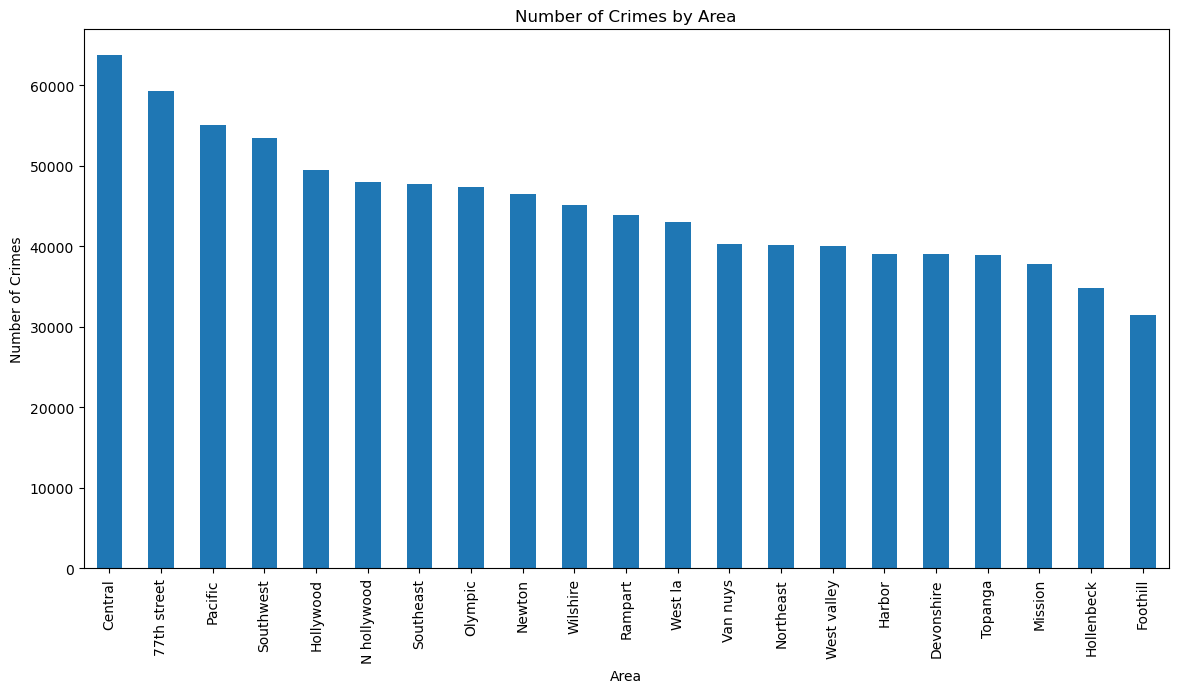

In [1066]:
# Count crimes per area
area_crimes = crime_df['area_name'].value_counts()

# Plot
plt.figure(figsize=(14, 7))
area_crimes.plot(kind='bar')
plt.title('Number of Crimes by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

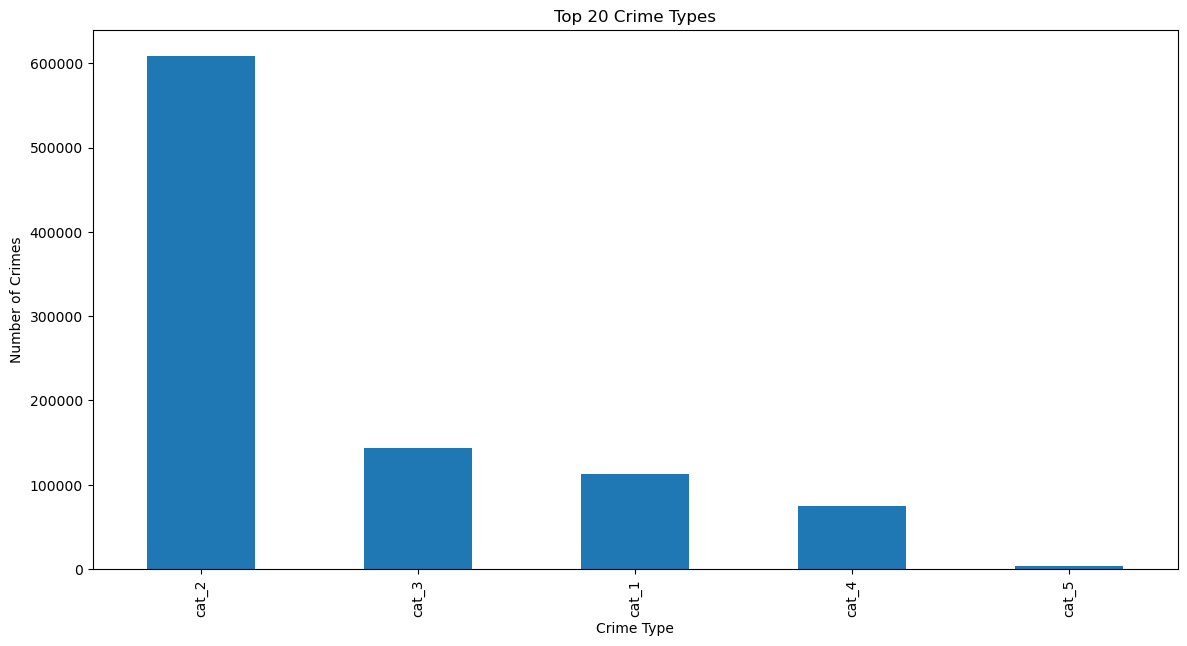

In [1067]:
# Count crime types
crime_types = crime_df['crime_seriousness'].value_counts().head(20)  # Display top 20 crime types

# Plot
plt.figure(figsize=(14, 7))
crime_types.plot(kind='bar')
plt.title('Top 20 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

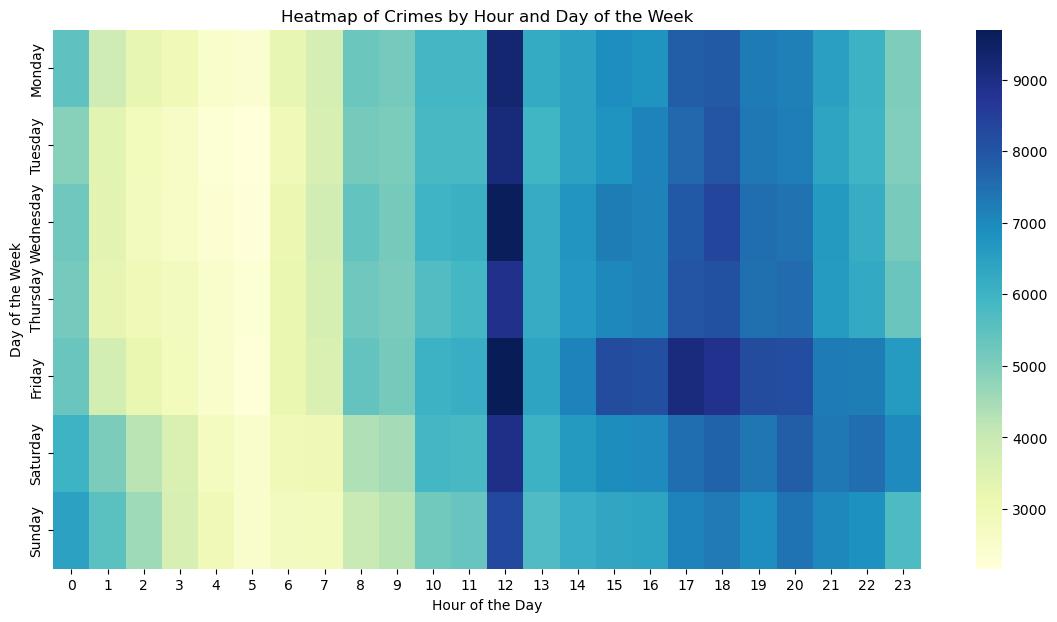

In [1068]:
# I dont like this one.

# Extract hour and day of the week
crime_df['hour'] = crime_df['time_occ'] // 100
crime_df['day_of_week'] = crime_df['date_occ'].dt.day_name()

# Create pivot table
hour_day_crimes = crime_df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_day_crimes = hour_day_crimes.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(hour_day_crimes, cmap='YlGnBu')
plt.title('Heatmap of Crimes by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

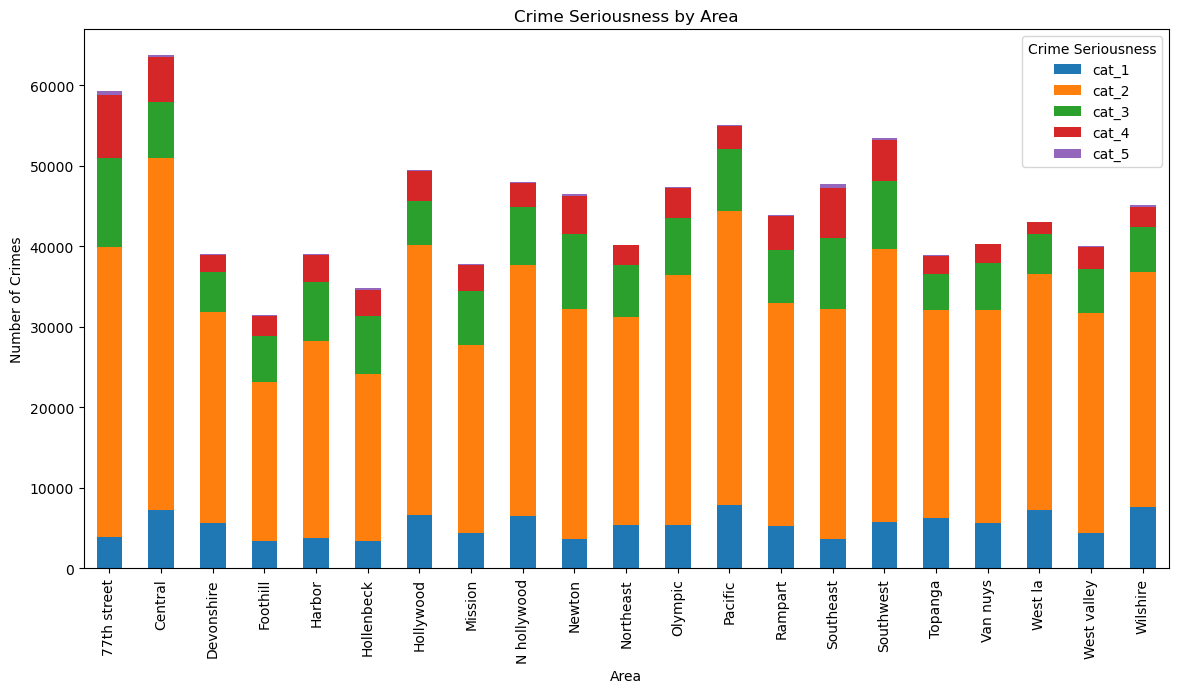

In [1069]:
# Group by area and crime seriousness
area_seriousness = crime_df.groupby(['area_name', 'crime_seriousness']).size().unstack()

# Plot
area_seriousness.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Crime Seriousness by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Seriousness')
plt.xticks(rotation=90)
plt.show()

In [662]:
#For HeatMap

# # Function to extract all coordinates from a polygon
# def extract_coordinates(geometry):
#     if geometry.geom_type == 'Polygon':
#         return list(geometry.exterior.coords)
#     elif geometry.geom_type == 'MultiPolygon':
#         coords = []
#         for polygon in geometry:
#             coords.extend(polygon.exterior.coords)
#         return coords
#     else:
#         return []

# # Extract all coordinates
# all_coords = geodata['geometry'].apply(extract_coordinates)

# # Flatten the list of coordinates
# flattened_coords = [coord for sublist in all_coords for coord in sublist]

# # Ensure the coordinates are tuples
# if all(isinstance(coord, tuple) and len(coord) == 2 for coord in flattened_coords):
#     # Create a DataFrame of the coordinates
#     coords_df = pd.DataFrame(flattened_coords, columns=['lon', 'lat'])
# else:
#     print("Error: Coordinates are not properly formatted.")

In [663]:
#For HeatMap

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create the heatmap
# plt.figure(figsize=(10, 8))
# sns.kdeplot(x=coords_df['lon'], y=coords_df['lat'], cmap="Reds", fill=True, bw_adjust=0.5)

# plt.title('Heat Map of Polygon Coordinates')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

In [664]:
# #DON"T RUN

# cat_5_df['lat'] = pd.to_numeric(cat_5_df['lat'], errors='coerce')
# cat_5_df['lon'] = pd.to_numeric(cat_5_df['lon'], errors='coerce')

# # Drop rows with missing latitude or longitude
# cat_5_df.dropna(subset=['lat', 'lon'], inplace=True)

# # Create a base map centered around Los Angeles
# map_la = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# # Add CircleMarker for each crime incident in cat_5_df
# for index, row in cat_5_df.iterrows():
#     folium.CircleMarker(
#         location=[row['lat'], row['lon']],
#         radius=3,  # Adjust the radius as needed
#         popup=row['crm_cd_desc'],
#         color='red',  # Adjust the color as needed
#         fill=True,
#         fill_color='red'  # Adjust the fill color as needed
#     ).add_to(map_la)

# # Save the map as an HTML file
# map_la.save('crime_map_circle_crime_5.html')

# # Display the map (optional)
# map_la

In [665]:
# #DON"T RUN

# cat_4_df['lat'] = pd.to_numeric(cat_4_df['lat'], errors='coerce')
# cat_4_df['lon'] = pd.to_numeric(cat_4_df['lon'], errors='coerce')

# # Drop rows with missing latitude or longitude
# cat_4_df.dropna(subset=['lat', 'lon'], inplace=True)

# # Create a base map centered around Los Angeles
# map_la = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# # Add CircleMarker for each crime incident in cat_4_df
# for index, row in cat_4_df.iterrows():
#     folium.CircleMarker(
#         location=[row['lat'], row['lon']],
#         radius=1,  
#         popup=row['crm_cd_desc'],
#         color='orange',  
#         fill=True,
#         fill_color='red'  
#     ).add_to(map_la)

# # Save the map as an HTML file
# map_la.save('crime_map_circle_crime_4.html')

# # Display the map 
# map_la

In [666]:
# #DON"T RUN

# cat_3_df['lat'] = pd.to_numeric(cat_3_df['lat'], errors='coerce')
# cat_3_df['lon'] = pd.to_numeric(cat_3_df['lon'], errors='coerce')

# # Drop rows with missing latitude or longitude
# cat_3_df.dropna(subset=['lat', 'lon'], inplace=True)

# # Create a base map centered around Los Angeles
# map_la = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# # Add CircleMarker for each crime incident in cat_4_df
# for index, row in cat_3_df.iterrows():
#     folium.CircleMarker(
#         location=[row['lat'], row['lon']],
#         radius=1,  
#         popup=row['crm_cd_desc'],
#         color='yellow',  
#         fill=True,
#         fill_color='orange'  
#     ).add_to(map_la)

# # Save the map as an HTML file
# map_la.save('crime_map_circle_crime_3.html')

# # Display the map 
# map_la

## Combibig DFs

In [1119]:
crime_df = pd.merge(crime_df, economical_df, on='area_name')

#Merging 2 DFs in ONE df "crime_df" by column "area_name"

In [1121]:
crime_df

,date_occ,time_occ,area,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,lat,lon,crime_seriousness,hour,day_of_week,median_income,civilian_labor_force,number_unemployed_individuals,education,state,county,county_subdivision,unemployed_rating
0,2020-03-01,2130,7,Wilshire,VEHICLE - STOLEN,37,M,O,STREET,NO-WEAPON,Adult Arrest,34.0375,-118.3506,cat_3,21,Sunday,91856,161027,7704,35485,6,37,93730,4.78
1,2020-11-27,1800,7,Wilshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31,F,O,STREET,VEHICLE,Adult Arrest,34.0452,-118.3351,cat_4,18,Friday,91856,161027,7704,35485,6,37,93730,4.78
2,2020-02-11,1200,7,Wilshire,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",57,F,B,SINGLE FAMILY DWELLING,NO-WEAPON,Invest Cont,34.0608,-118.3359,cat_2,12,Tuesday,91856,161027,7704,35485,6,37,93730,4.78
3,2020-01-01,1,7,Wilshire,THEFT OF IDENTITY,32,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NO-WEAPON,Invest Cont,34.0431,-118.3482,cat_2,0,Wednesday,91856,161027,7704,35485,6,37,93730,4.78
4,2020-08-03,1908,7,Wilshire,THEFT OF IDENTITY,18,M,B,SINGLE FAMILY DWELLING,NO-WEAPON,Invest Cont,34.0394,-118.3541,cat_2,19,Monday,91856,161027,7704,35485,6,37,93730,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713723,2024-03-11,945,17,Devonshire,THEFT PLAIN - PETTY ($950 & UNDER),38,M,W,PARKING LOT,NO-WEAPON,Invest Cont,34.2427,-118.5361,cat_1,9,Monday,82697,101261,6961,17490,6,37,93090,6.87
713724,2024-03-30,1350,17,Devonshire,VEHICLE - STOLEN,37,NaN,NaN,STREET,NO-WEAPON,Invest Cont,34.2222,-118.5842,cat_3,13,Saturday,82697,101261,6961,17490,6,37,93090,6.87
713725,2024-03-10,1220,17,Devonshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",27,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",HAND GUN,Adult Other,34.2410,-118.5623,cat_4,12,Sunday,82697,101261,6961,17490,6,37,93090,6.87
713726,2024-04-29,115,17,Devonshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",14,M,H,TUNNEL,OTHER KNIFE,Invest Cont,34.2283,-118.5448,cat_4,1,Monday,82697,101261,6961,17490,6,37,93090,6.87


In [1123]:
crime_df = pd.merge(crime_df, geodata, on='area_name')

In [1125]:
crime_df

,date_occ,time_occ,area_x,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,lat,lon,crime_seriousness,hour,day_of_week,median_income,civilian_labor_force,number_unemployed_individuals,education,state,county,county_subdivision,unemployed_rating,objectid,prec,area_y,perimeter,geometry
0,2020-03-01,2130,7,Wilshire,VEHICLE - STOLEN,37,M,O,STREET,NO-WEAPON,Adult Arrest,34.0375,-118.3506,cat_3,21,Sunday,91856,161027,7704,35485,6,37,93730,4.78,13,7,3.270671e+08,100948.314557,"POLYGON ((6447735.108 1844285.258, 6447780 184..."
1,2020-11-27,1800,7,Wilshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31,F,O,STREET,VEHICLE,Adult Arrest,34.0452,-118.3351,cat_4,18,Friday,91856,161027,7704,35485,6,37,93730,4.78,13,7,3.270671e+08,100948.314557,"POLYGON ((6447735.108 1844285.258, 6447780 184..."
2,2020-02-11,1200,7,Wilshire,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",57,F,B,SINGLE FAMILY DWELLING,NO-WEAPON,Invest Cont,34.0608,-118.3359,cat_2,12,Tuesday,91856,161027,7704,35485,6,37,93730,4.78,13,7,3.270671e+08,100948.314557,"POLYGON ((6447735.108 1844285.258, 6447780 184..."
3,2020-01-01,1,7,Wilshire,THEFT OF IDENTITY,32,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NO-WEAPON,Invest Cont,34.0431,-118.3482,cat_2,0,Wednesday,91856,161027,7704,35485,6,37,93730,4.78,13,7,3.270671e+08,100948.314557,"POLYGON ((6447735.108 1844285.258, 6447780 184..."
4,2020-08-03,1908,7,Wilshire,THEFT OF IDENTITY,18,M,B,SINGLE FAMILY DWELLING,NO-WEAPON,Invest Cont,34.0394,-118.3541,cat_2,19,Monday,91856,161027,7704,35485,6,37,93730,4.78,13,7,3.270671e+08,100948.314557,"POLYGON ((6447735.108 1844285.258, 6447780 184..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713723,2024-03-11,945,17,Devonshire,THEFT PLAIN - PETTY ($950 & UNDER),38,M,W,PARKING LOT,NO-WEAPON,Invest Cont,34.2427,-118.5361,cat_1,9,Monday,82697,101261,6961,17490,6,37,93090,6.87,2,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408709 194..."
713724,2024-03-30,1350,17,Devonshire,VEHICLE - STOLEN,37,NaN,NaN,STREET,NO-WEAPON,Invest Cont,34.2222,-118.5842,cat_3,13,Saturday,82697,101261,6961,17490,6,37,93090,6.87,2,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408709 194..."
713725,2024-03-10,1220,17,Devonshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",27,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",HAND GUN,Adult Other,34.2410,-118.5623,cat_4,12,Sunday,82697,101261,6961,17490,6,37,93090,6.87,2,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408709 194..."
713726,2024-04-29,115,17,Devonshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",14,M,H,TUNNEL,OTHER KNIFE,Invest Cont,34.2283,-118.5448,cat_4,1,Monday,82697,101261,6961,17490,6,37,93090,6.87,2,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408709 194..."


In [426]:
crime_df["median_income"].isna().sum()

#Cheking merged df "crime_df" by column "area_name"

0

In [428]:
crime_df

,date_occ,time_occ,area,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,lat,lon,crime_seriousness,median_income,civilian_labor_force,number_unemployed_individuals,education,state,county,county_subdivision,unemployed_rating
0,2020-03-01,2130,7,Wilshire,VEHICLE - STOLEN,37,M,O,STREET,NO-WEAPON,Adult Arrest,34.0375,-118.3506,cat_3,91856,161027,7704,35485,6,37,93730,4.78
1,2020-11-27,1800,7,Wilshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",31,F,O,STREET,VEHICLE,Adult Arrest,34.0452,-118.3351,cat_4,91856,161027,7704,35485,6,37,93730,4.78
2,2020-02-11,1200,7,Wilshire,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",57,F,B,SINGLE FAMILY DWELLING,NO-WEAPON,Invest Cont,34.0608,-118.3359,cat_2,91856,161027,7704,35485,6,37,93730,4.78
3,2020-01-01,1,7,Wilshire,THEFT OF IDENTITY,32,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NO-WEAPON,Invest Cont,34.0431,-118.3482,cat_2,91856,161027,7704,35485,6,37,93730,4.78
4,2020-08-03,1908,7,Wilshire,THEFT OF IDENTITY,18,M,B,SINGLE FAMILY DWELLING,NO-WEAPON,Invest Cont,34.0394,-118.3541,cat_2,91856,161027,7704,35485,6,37,93730,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896306,2024-03-11,945,17,Devonshire,THEFT PLAIN - PETTY ($950 & UNDER),38,M,W,PARKING LOT,NO-WEAPON,Invest Cont,34.2427,-118.5361,cat_1,82697,101261,6961,17490,6,37,93090,6.87
896307,2024-03-30,1350,17,Devonshire,VEHICLE - STOLEN,37,NaN,NaN,STREET,NO-WEAPON,Invest Cont,34.2222,-118.5842,cat_3,82697,101261,6961,17490,6,37,93090,6.87
896308,2024-03-10,1220,17,Devonshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",27,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",HAND GUN,Adult Other,34.2410,-118.5623,cat_4,82697,101261,6961,17490,6,37,93090,6.87
896309,2024-04-29,115,17,Devonshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",14,M,H,TUNNEL,OTHER KNIFE,Invest Cont,34.2283,-118.5448,cat_4,82697,101261,6961,17490,6,37,93090,6.87


In [15]:
#Economical-map
#crime-divide for gravity-3/5 cat.
#date and time to highlight when most crime is committed gender and age of victim/per location
#gender and age of victim/per location
# % of arrested criminals/divided for cat.crime 
# crime with weapon
#divide in 4 dataset- for respective gravity code crm cd 1 etc 

## API: Economical Data

In [62]:
# Your Census API key
api_key = api_key_census
# API endpoint for the American Community Survey (ACS)
base_url = 'https://api.census.gov/data/2022/acs/acs5'
# Variables to retrieve (e.g., median household income)
variables = ['NAME', 'B19013_001E', 'B23025_003E', 'B23025_005E', 'B15003_022E']
# Specify the geographic area (Los Angeles County, CA)
for_clause = 'county subdivision:*'
in_clause = 'state:06 county:037'
# Construct the full API request URL
print(f"{base_url}?get={','.join(variables)}&for={for_clause}&in={in_clause}&key={api_key}")
api_url = f"{base_url}?get={','.join(variables)}&for={for_clause}&in={in_clause}&key={api_key}"
# Make the GET request to the Census API
response = requests.get(api_url)
# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response into a DataFrame
    data = response.json()
    df = pd.DataFrame(data[1:], columns=data[0])
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
# Optional: Save the data to a CSV file
df.to_csv('economical_data_2022.csv', index=False)

https://api.census.gov/data/2022/acs/acs5?get=NAME,B19013_001E,B23025_003E,B23025_005E,B15003_022E&for=county subdivision:*&in=state:06 county:037&key=c8ece4d4c8d1f906496a288719673264f36c2dd2
                                                NAME B19013_001E B23025_003E  \
0  Agoura Hills-Malibu CCD, Los Angeles County, C...      157333       30594   
1        Compton CCD, Los Angeles County, California       77931      165822   
2  Downey-Norwalk CCD, Los Angeles County, Califo...       84976      210524   
3  East San Gabriel Valley CCD, Los Angeles Count...       91440      481099   
4      Inglewood CCD, Los Angeles County, California       70593      198344   

  B23025_005E B15003_022E state county county subdivision  
0        2093       15573    06    037              90015  
1       13260       29818    06    037              90560  
2       13089       49877    06    037              90730  
3       29949      126953    06    037              90810  
4       14600       39929  